In [1]:
print('Week 4 Day 4')

Week 4 Day 4


In [ ]:
# HasiTV


In [60]:
import pandas as pd

data = pd.read_csv('../data/employee_data.csv')
df1 = pd.DataFrame(data)
df1.head()

,Employee_ID,Department,Salary,Performance_Before_Training,Performance_After_Training,Training_Completed
0,1,HR,69901,95,71,0
1,2,HR,44605,55,97,1
2,3,Finance,60757,53,62,0
3,4,HR,47306,97,87,1
4,5,Finance,114353,64,74,1


In [15]:
# How to check whether Salary Column is Normally distributed or not
# We will use Shapiro-Wilk test to check the normality of the data

from scipy.stats import shapiro
stats, p_value = shapiro(df['Salary'])

# The second output is the p-value. If this value is less than 0.05, we reject the null hypothesis that the data is normally distributed.
# If the p-value is greater than 0.05, we fail to reject the null hypothesis
# In this case, the p-value is 0.000, which is less than 0
# We reject the null hypothesis and conclude that the data is not normally distributed
# This is expected because the data is skewed to the right

print(f"Stats: {stats}\nP-Value: {p_value}")





Stats: 0.931566926702201
P-Value: 6.11421425795256e-05


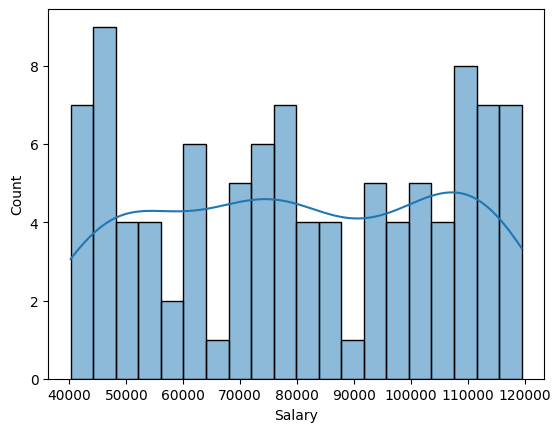

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Now let's plot the histogram of Salary

sns.histplot(df.Salary, kde=True, bins=20)
plt.show()

In [16]:
# Normal Data 
normal = pd.read_csv("../data/employee_data_normal.csv")
df = pd.DataFrame(normal)
df.head()

,Employee_ID,Department,Performance_Before_Training,Performance_After_Training,Training_Completed,Salary
0,1,Marketing,88,64,1,88503
1,2,Marketing,92,95,0,82437
2,3,IT,89,95,1,84769
3,4,Finance,85,67,1,87661
4,5,Marketing,51,71,1,82651


In [20]:
dep_group = df.groupby('Department')['Salary'].mean()
dep_group

Department
Finance      88629.458333
HR           75129.357143
IT           85032.307692
Marketing    81071.772727
Name: Salary, dtype: float64

In [27]:
stats, p_value = shapiro(df[df.Department == 'HR']['Salary'])
stats_1, p_value_1 = shapiro(df['Salary'])

print(f"Stats: {stats:.3f}\nP-Value: {p_value:.2f}")
print("............................................")
print(f"Stats: {stats_1:.3f}\nP-Value: {p_value_1:.2f}")

Stats: 0.948
P-Value: 0.17
............................................
Stats: 0.988
P-Value: 0.53


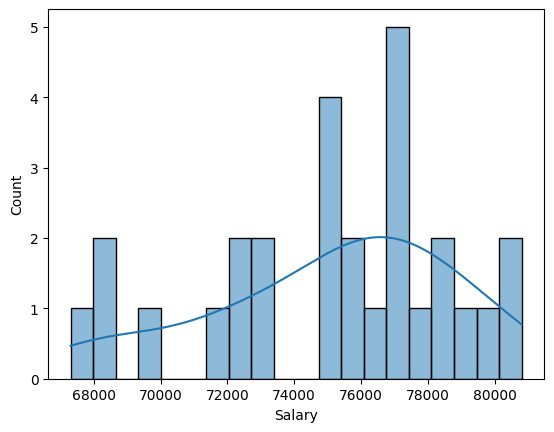

In [21]:
# shapiro test of HR department Salary

sns.histplot(df[df.Department == 'HR']['Salary'], kde=True, bins=20)
plt.show()

In [50]:
# t-test on salary 
from scipy.stats import ttest_1samp

stat, value = ttest_1samp(df['Salary'], 50000)
print(f"T-test P-value: {value}")
print(f"T-test Stat: {stat:.3f}")


T-test P-value: 5.82299535554951e-69
T-test Stat: 46.377


In [ ]:
from scipy.stats import ttest_ind

salary_IT = df[df['Department'] == 'IT']['Salary']
salary_HR = df[df['Department'] == 'HR']['Salary']
salary_Sales = df[df['Department'] == 'Sales']['Salary']
f_stat, p_value = ttest_ind(salary_IT, salary_HR)
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis, IT and HR Salaries are not same (Significant Difference)")
else:
    print("Fail to reject the null hypothesis, IT and HR Salaries are same (No Significant Difference)")

P-value: 3.329951019818099e-11
Reject the null hypothesis, IT and HR Salaries are not same (Significant Difference)


In [83]:
#  Annovaa Test Now

from scipy.stats import f_oneway

salary_IT = df1[df1['Department'] == 'IT']['Salary']
salary_HR = df1[df1['Department'] == 'HR']['Salary']
salary_Marketing = df1[df1['Department'] == 'Marketing']['Salary']

f_stat, p_value = f_oneway(salary_IT, salary_HR, salary_Marketing)
print(f"P-value: {p_value}")

P-value: 0.6047984597044143


In [81]:
from scipy.stats import f_oneway

# Ensure there are no NaN values and all groups have valid data
df1['Salary'] = pd.to_numeric(df1['Salary'], errors='coerce')  # Ensure Salary is numeric
df1 = df1.dropna(subset=['Salary', 'Department'])             # Drop rows with NaN in key columns

# Group the salaries by department
salary_IT = df1[df1['Department'] == 'IT']['Salary'].dropna()
salary_HR = df1[df1['Department'] == 'HR']['Salary'].dropna()
salary_Marketing = df1[df1['Department'] == 'Marketing']['Salary'].dropna()

# Ensure all groups have data
if len(salary_IT) > 0 and len(salary_HR) > 0 and len(salary_Sales) > 0:
    f_stat, p_value = f_oneway(salary_IT, salary_HR, salary_Marketing)
    print(f"P-value: {p_value}")
else:
    print("One or more groups are empty or have insufficient data.")


P-value: 0.6047984597044143


In [86]:
from scipy.stats import kruskal
k_stat, p_value = kruskal(salary_IT, salary_HR, salary_Marketing)
print(f"Kruskal-Wallis Test P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis, IT and HR Salaries are not same (Significant Difference)")
else:
    print("Fail to reject the null hypothesis, IT and HR Salaries are same (No Significant Difference)")

Kruskal-Wallis Test P-value: 0.6020116609983333
Fail to reject the null hypothesis, IT and HR Salaries are same (No Significant Difference)


In [88]:
from scipy.stats import levene
stat, p_value = levene(salary_IT, salary_HR, salary_Sales)
print(f"Levene's Test P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis, IT and HR Salaries are not same (Significant Difference)")
else:
    print("Fail to reject the null hypothesis, IT and HR Salaries are same (No Significant Difference)")

Levene's Test P-value: 0.049299916220972476
Reject the null hypothesis, IT and HR Salaries are not same (Significant Difference)
